##Тестовое задание 2


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('/content/drive/MyDrive/Feedback_Manager_test_data.csv')

## 1. Познакомимся с данными

In [101]:
df.head()

,answer_date,group,profession,question,answer,topic
0,08.12.2011,1,Тестировщик острых блюд,"Оцените, насколько вам понравился урок от 1 до 5",4,100 видов перцов чили
1,06.12.2011,1,Тестировщик острых блюд,"Оцените, насколько вам понравился урок от 1 до 5",5,100 видов перцов чили
2,15.12.2011,5,Инженер по созданию синхрофазотрона,Здесь вы можете оставить подробный отзыв,"Долго не понимал, как же правильно. В итоге те...",СинхрофазаЧТО?
3,16.12.2011,2,Тестировщик острых блюд,"Оцените, насколько вам понравился урок от 1 до 5",5,100 видов перцов чили
4,08.12.2011,1,Тестировщик острых блюд,"Оцените, насколько вам понравился урок от 1 до 5",5,100 видов перцов чили


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   answer_date  100 non-null    object
 1   group        100 non-null    int64 
 2   profession   100 non-null    object
 3   question     100 non-null    object
 4   answer       100 non-null    object
 5   topic        100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [103]:
df.answer_date.min(), df.answer_date.max()

('02.12.2011', '22.12.2011')

Данные предоставленны со 2 по 22 декабря 2011 гг. Пропуски в данных отсутствуют. На дубликаты смотреть нет смысла, так как ответы могут повторяться у разных людей. Идём дальше.

In [104]:
df['group'].value_counts().sort_index()

1    20
2    22
3    19
4    15
5    24
Name: group, dtype: int64

В опросе принимало участие 5 групп. Состав групп от 15 до 24 человек.

In [105]:
df['profession'].value_counts(ascending = False)

Тестировщик острых блюд                61
Инженер по созданию синхрофазотрона    39
Name: profession, dtype: int64

Профессий всего две. При этом тестировщиков почти в 2 раза больше.

In [106]:
df['question'].value_counts(ascending = False)

Оцените, насколько вам понравился урок от 1 до 5    50
Здесь вы можете оставить подробный отзыв            50
Name: question, dtype: int64

Задавались 2 вопроса: оценить и оставить отзыв.

In [107]:
df['topic'].value_counts(ascending = False)

100 видов перцов чили                                               34
Считаем сковилли вместе                                             27
Билет номер семь. Первый вопрос. Принцип работы синхрофазотрона.    22
СинхрофазаЧТО?                                                      17
Name: topic, dtype: int64

Было четыре темы урока

## 2. Проанализируем обратную связь от студентов

### 2.1. Тема урока: '**100** видов перцов чили' 
(Курс "Тестировщик острых блюд")

In [108]:
chili_score = df[(df['topic'] == '100 видов перцов чили') & (df['question'] == 'Оцените, насколько вам понравился урок от 1 до 5')]

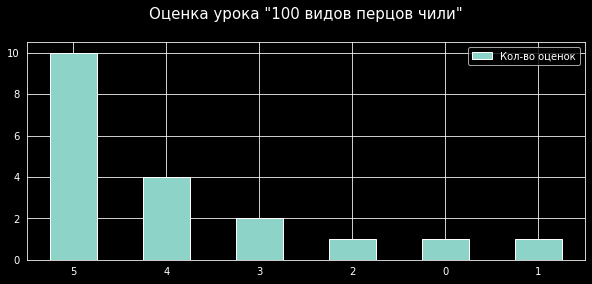

In [109]:
chili_score['answer'].value_counts().plot(x='answer', kind='bar', figsize=(10,4))
sns.set_style("darkgrid")
plt.style.use('dark_background')
plt.title('Оценка урока "100 видов перцов чили"\n', fontsize=15)
plt.legend(['Кол-во оценок'],loc='upper right')
plt.xticks(rotation = 0)
plt.show()

Абсолютному большинству урок '100 видов перцов чили' понравился. Только единицы поставили плохие оценки.

In [110]:
chili_feedback = df[(df['topic'] == '100 видов перцов чили') & (df['question'] == 'Здесь вы можете оставить подробный отзыв')]

In [111]:
chili_feedback['answer'].values

array(['Показали только 98…',
       'Вау, я думал, их только 76! Очень интересно!',
       'Долго не мог решить 3-ую задачу про халапеньо. Оказалось, у вас опечатка в задании. Посмотрите, пожалуйста. В остальном все супер.',
       'Все супер топ! :)',
       'Круто вы таблицу сделали! И про виды мексиканских перцев просто вау…',
       '0/10 этому уроку, неприменимые на практике знания, да еще и никак не связаны с реальной жизнью - желтый переце чили явно вкуснее зеленого!!!!',
       'я картофель', 'То, ради чего я купил курс! Супер урок!',
       'Все понравилось',
       'Мне ничего не понравилось, но что именно, мне не понравилось, я не понял - прошу передать мой фидбэк!',
       'Тренажер работает очень быстро! ', 'Нет слов',
       'Дочитал только до 71-ого, скучно…',
       'Добавьте, пожалуйста, в конце теоретической части про веганский перец! ',
       'Я бы хотел примерно еще 41 похожий урок, добавьте в ближайшую неделю, пожалуйста, понравилось'],
      dtype=object)

### Вывод по уроку:

1. Урок называется 100 видов перцов чили, а показали только 98. Куда делись ещё два вида? А может быть студент просто не правильно посчитал?
2. В 3-ей задаче про халапенью нужно исправить опечатку.
3. Одному из студентов не понравились задания, говорит, что неприменимые на практике. Возможно какие-то из них нужно пересмотреть. Сделать задания более жизненными и нужными в быту.
4. Есть мнение, что задания скучные. Возможно нужно добавить креатива в тренажер.
5. Веганский перец. Такой существует? Будет ли уместно добавить его в курс?

Данные вопросы я бы обсудил с авторами курса и затем внёс соответствующие корректировки. 

### 2.2. Тема урока: 'Считаем сковилли вместе' 
(Курс "Тестировщик острых блюд")

In [112]:
skovilli_score = df[(df['topic'] == 'Считаем сковилли вместе') & (df['question'] == 'Оцените, насколько вам понравился урок от 1 до 5')]

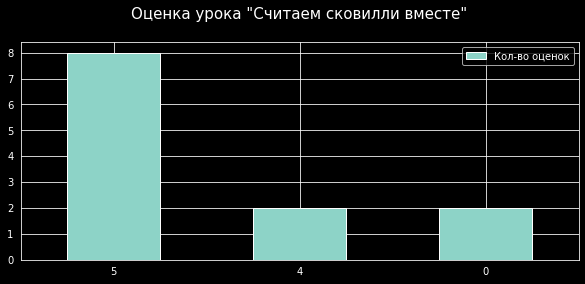

In [113]:
skovilli_score['answer'].value_counts().plot(x='answer', kind='bar', figsize=(10,4))
plt.title('Оценка урока "Считаем сковилли вместе"\n', fontsize=15)
plt.legend(['Кол-во оценок'],loc='upper right')
plt.xticks(rotation = 0)
plt.show()

10 студентам из 12 опрошенных урок "Считаем сковилли вместе" понравился. Они поставили оценки 4 и 5.

In [114]:
skovilli_feedback = df[(df['topic'] == 'Считаем сковилли вместе') & (df['question'] == 'Здесь вы можете оставить подробный отзыв')]

In [115]:
skovilli_feedback['answer'].values

array(['Что-то я запутался в расчетах, было сложно',
       'Без подсказки не разобраться, сложная задачка',
       'большое спасибо любимому куратору!',
       'Спасибо за дополнительные материалы в конце урока! Вы лучшие!',
       'Задачи очень понравились, в меру сложные',
       'Задачи вообще не в меру сложные, потратил 4 дня на их решение!',
       'Наконец я знаю, как их считать!!)',
       'Мне преподаватель хорошо объяснил, как тут надо считать, ему спасибо',
       'Пока со стороны новичка все хорошо, проект сдан, а это значит можно двигаться дальше',
       'А я все расчеты в калькуляторе делал)))))',
       'Насчитал вам 5 баллов за урок! :)',
       'Побольше бы примеров расчета, в остальном все круто',
       'Ага, ясно-понятно', 'Вроде норм',
       'Проходил курс по созданию синхрофазатрона, так вот этот даже лучше! Респект!)'],
      dtype=object)

### Вывод по уроку:

Очень много жалоб на сложные задачки и отсутствие необходимых примеров. Нужно сделать на этом акцент. Более подробно разобрать тему в процессе урока, добавить примеров. Возможно реализовать какие-либо подсказки если студент не справляется.


### 2.3. Тема урока: 'Билет номер семь. Первый вопрос. Принцип работы синхрофазотрона.' 
(Курс "Инженер по созданию синхрофазотрона")

In [116]:
ticket7_score = df[(df['topic'] == 'Билет номер семь. Первый вопрос. Принцип работы синхрофазотрона.') & (
    df['question'] == 'Оцените, насколько вам понравился урок от 1 до 5')]

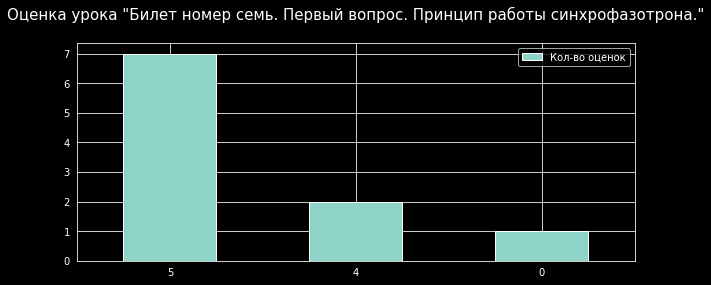

In [117]:
ticket7_score['answer'].value_counts().plot(x='answer', kind='bar', figsize=(10,4))
plt.title('Оценка урока "Билет номер семь. Первый вопрос. Принцип работы синхрофазотрона."\n', fontsize=15)
plt.legend(['Кол-во оценок'],loc='upper right')
plt.xticks(rotation = 0)
plt.show()

9-ти из 10-ти студентов урок "Билет номер семь. Первый вопрос. Принцип работы синхрофазотрона." понравился. Я считаю это хорошей оценкой.

In [118]:
ticket7_feedback = df[(df['topic'] == 'Билет номер семь. Первый вопрос. Принцип работы синхрофазотрона.') & (
    df['question'] == 'Здесь вы можете оставить подробный отзыв')]

In [119]:
ticket7_feedback['answer'].values

array(['Очень много теории, я запутался, и боюсь не понять отсылку к "Операции Ы"',
       'Материал супер! Второй раз точно отвечу',
       'Иллюстрации к уроку очень понравились',
       'Это лучше прошлого урока, но хуже следующего',
       'В 5-ом абзаце, 2-ом предложении не хватает запятой..',
       'всем привет))',
       'Тренажер у вас какой-то глючный, принимает только правильное решение…',
       'Обожаю ребят из команды фидбэка, вы лучшие!',
       'Материал по теме дан немного непонятно, недоступно. В теории указано, что нужен квантовый ускоритель, а в задачах говорится про протонный. ',
       'После этого урока меня точно инжереном-джуном возьмут!',
       'Тренажёр отличный ',
       'Настолько понятный урок, что у меня пучок частиц пришел в ускоряющую секцию в фазе с высокочастотным электрическим полем всего за 0.3 наносек!!'],
      dtype=object)

### Вывод по уроку:

Есть жалобы на непонятность материала в теории и высокую сложность. Мне кажется следует обратить внимание на более доступную подачу информации. Какие то моменты нужно "разжевать" для студента, что бы понимание пришло.

### 2.4. Тема урока: 'СинхрофазаЧТО?' 
(Курс "Инженер по созданию синхрофазотрона")

In [120]:
synchrophasa_score = df[(df['topic'] == 'СинхрофазаЧТО?') & (df['question'] == 'Оцените, насколько вам понравился урок от 1 до 5')]

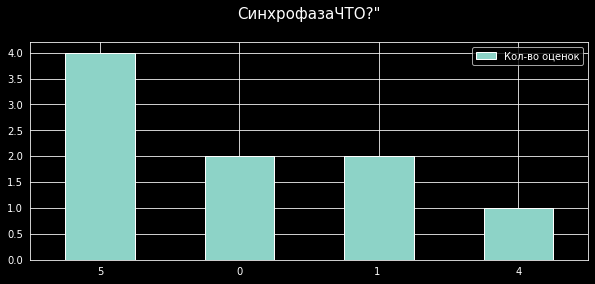

In [121]:
synchrophasa_score['answer'].value_counts().plot(x='answer', kind='bar', figsize=(10,4))
plt.title('СинхрофазаЧТО?"\n', fontsize=15)
plt.legend(['Кол-во оценок'],loc='upper right')
plt.xticks(rotation = 0)
plt.show()

Половине студентов урок не понравился, они поставили оценки ниже 2. Это тревожный звоночек. Давайте разбираться, что с уроком не так.

In [122]:
synchrophasa_feedback = df[(df['topic'] == 'СинхрофазаЧТО?') & (df['question'] == 'Здесь вы можете оставить подробный отзыв')]

In [123]:
synchrophasa_feedback['answer'].values

array(['Долго не понимал, как же правильно. В итоге теперь знаю!)',
       'Побольше бы задачек на эту тему, чтобы лучше усвоить',
       'Пытался проходить урок с микроволновки, но ваш сайт для этого совершенно не адаптирован! Исправьте!',
       'Написано, что на урок тратится 15 мин, а я прошел за 18! Прошу исправить!',
       'Задачки разнообразные, понравилось',
       'Очень бы хотелось видео-лекцию на эту тему!',
       'Как жаль, что урок закончился! ',
       'Круто, что освежили в памяти эту тему'], dtype=object)

### Вывод по уроку:

1. Нужно добавить задачек на данную тему.
2. Рассмотреть вариант адаптации сайта для микроволновки. Чтобы он с неё так же работал.
3. Проверить среднее время прохождения урока. Есть жалобы на несоответствие.
4. Рассмотреть возможность добавления видео-лекции. Если это уместно.